##### Домашнее задание 2. Задание на создание автоэнкодера.

##### 8. Автоэнкодер для уменьшения размерности данных с последующей классификацией: Создание автоэнкодера, который снижает размерность высокоразмерных данных, после чего сжатые представления используются для задач классификации

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dropout

In [2]:
# Загрузка данных MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0  # Нормализация и изменение формы
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

# Преобразование меток в категории
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Разделение данных на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [3]:
# Определение размеров
input_dim = X_train.shape[1]
encoding_dim = 32  # Размерность после сжатия

# Входной слой
input_layer = Input(shape=(input_dim,))
# Кодировщик
encoded = Dense(encoding_dim, activation='relu')(input_layer)
# Декодировщик
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Автоэнкодер
autoencoder = Model(input_layer, decoded)
# Кодировщик
encoder = Model(input_layer, encoded)

# Компиляция модели
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:
# Обучение автоэнкодера
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val))

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4063 - val_loss: 0.2043
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1923 - val_loss: 0.1663
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1597 - val_loss: 0.1447
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1410 - val_loss: 0.1318
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1290 - val_loss: 0.1224
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1204 - val_loss: 0.1157
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1137 - val_loss: 0.1104
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1091 - val_loss: 0.1066
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1054 - val_loss: 0.1036
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1026 - val_loss: 0.1012
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1003 - val_loss: 0.0994
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [5]:
# Получение сжатых представлений
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Создание модели классификации
classifier = Sequential()

# Используйте InputLayer для определения входной размерности
classifier.add(Dense(64, activation='relu', input_shape=(encoding_dim,)))

# Добавляем слой Dropout для регуляризации
classifier.add(Dropout(0.5))

# Выходной слой
classifier.add(Dense(10, activation='softmax'))  # 10 классов для MNIST

# Компиляция модели
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение классификатора
classifier.fit(X_train_encoded, y_train,
                epochs=50,
                batch_size=256,
                validation_data=(encoder.predict(X_val), y_val))

184/375 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step

D:\GItHUB\DS_ls1\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1842 - loss: 6.7690 - val_accuracy: 0.6882 - val_loss: 1.1922
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5192 - loss: 1.4180 - val_accuracy: 0.8159 - val_loss: 0.7201
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6305 - loss: 1.0732 - val_accuracy: 0.8547 - val_loss: 0.5669
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6832 - loss: 0.9257 - val_accuracy: 0.8712 - val_loss: 0.4873
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7214 - loss: 0.8269 - val_accuracy: 0.8845 - val_loss: 0.4331
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7413 - loss: 0.7644 - val_accuracy: 0.8915 - val_loss: 0.3978
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7651 - loss: 0.7095 - val_accuracy: 0.9007 - val_loss: 0.3678
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


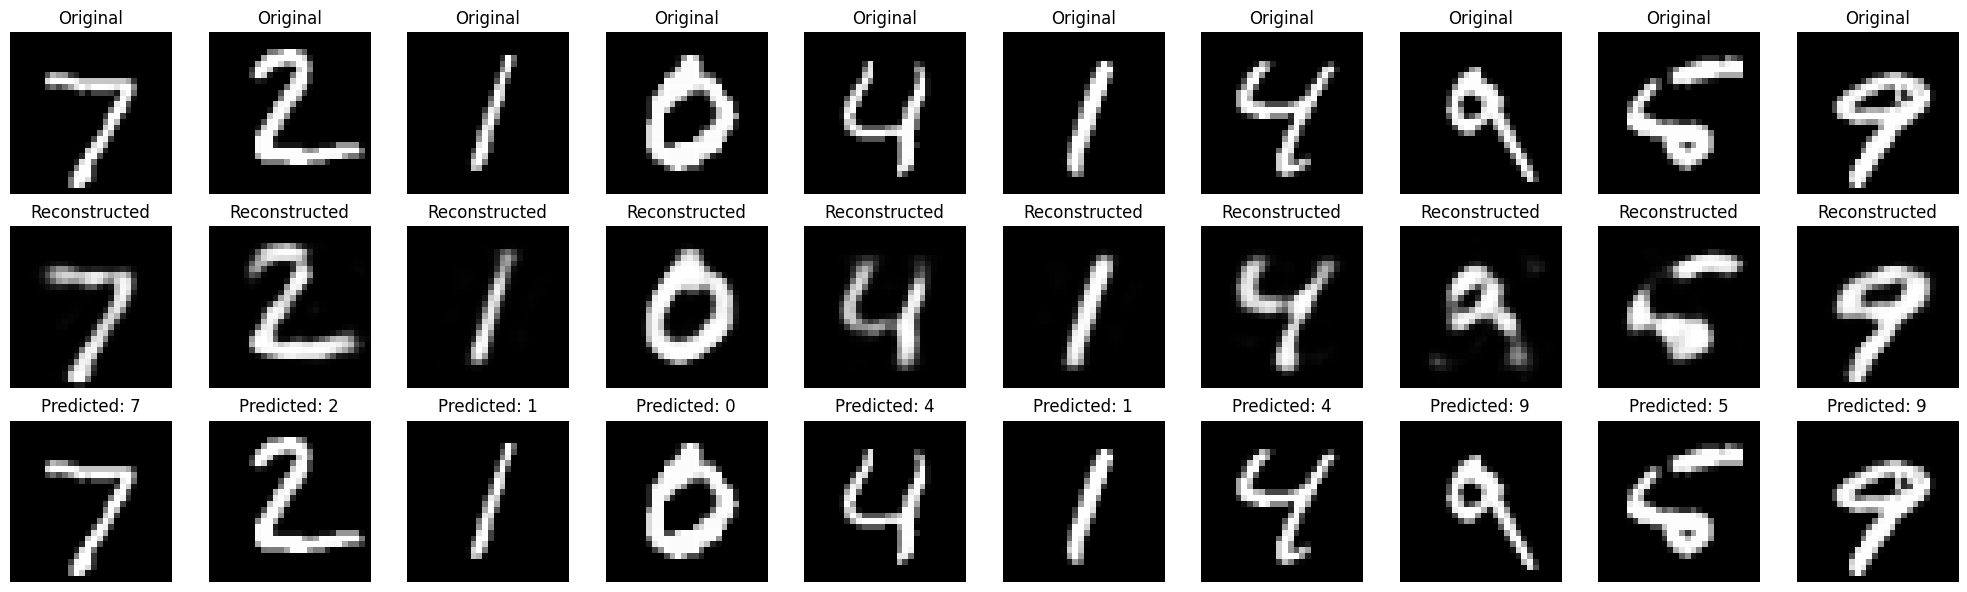

In [7]:
import matplotlib.pyplot as plt

# Получение предсказаний классификатора
y_pred = classifier.predict(X_test_encoded)
y_pred_classes = np.argmax(y_pred, axis=1)  # Получение предсказанных классов

# Восстановление изображений
X_test_reconstructed = autoencoder.predict(X_test)

# Функция для отображения изображений
def plot_images(original, reconstructed, predicted, n=10):
    plt.figure(figsize=(20, 6))
    
    for i in range(n):
        # Исходные изображения
        plt.subplot(3, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title('Original')

        # Восстановленные изображения
        plt.subplot(3, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title('Reconstructed')

        # Предсказанные классы
        plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(f'Predicted: {predicted[i]}')

    plt.tight_layout()
    plt.show()

# Визуализация
plot_images(X_test, X_test_reconstructed, y_pred_classes, n=10)

In [8]:
# Оценка модели на тестовом наборе
loss, accuracy = classifier.evaluate(X_test_encoded, y_test)
print(f'Test accuracy: {accuracy:.4f}')

# Прогнозирование
y_pred = classifier.predict(X_test_encoded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Отчет о классификации
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9383 - loss: 0.2128
Test accuracy: 0.9483
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.93      0.95      0.94      1010
           4       0.94      0.95      0.94       982
           5       0.96      0.92      0.94       892
           6       0.96      0.95      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.93      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Matrix:
 [[ 965    0    1    0    1    5    2    2    3    1]
 [ 